
# **Assignment 2 by group 96:** Was BR considered fairly or having any bias ?

## Data exploring and Data preprocessing

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

## Dataset

The data was recorded from 25 matches in AFL 2022. The dataset description is given to us:

Australian Rules Football Statistics

Dataset is from https://afltables.com/afl/stats/2022a.html

Knowledge about Australian Rules Football will be helpful if you are interested to work with this dataset.

- Player
- Tm=Team
- GM=Games played 
- KI=Kicks 
- MK=Marks 
- HB=Handballs 
- DI=Disposals 
- GL=Goals 
- BH=Behinds 
- HO=Hit outs 
- TK=Tackles 
- RB=Rebound SOs 
- IF=Inside SOs 
- CL=Clearances 
- CG=Clangers 
- FF=Free kicks for 
- FA=Free kicks against 
- BR=Brownlow votes 
- CP=Contested possessions 
- UP=Uncontested possessions 
- CM=Contested marks 
- MI=Marks inside SO 
- 1%=One percenters 
- BO=Bounces 
- GA=Goal assist 


In [433]:
# read the data file 
data = pd.read_csv("AFL-2022-totals.csv", index_col=0)
data.head(10)

,TM,GM,KI,MK,HB,DI,GL,BH,HO,TK,...,FF,FA,BR,CP,UP,CM,MI,1%,BO,GA
Player,,,,,,,,,,,,,,,,,,,,,
"Oliver, Clayton",ME,23,344.0,82.0,409.0,753.0,5.0,8.0,NaN,126.0,...,36.0,27.0,25.0,409.0,358.0,1.0,1.0,40.0,3.0,19.0
"Neale, Lachie",BL,25,346.0,96.0,403.0,749.0,11.0,8.0,NaN,113.0,...,44.0,23.0,28.0,400.0,350.0,7.0,7.0,24.0,13.0,14.0
"Macrae, Jack",WB,23,342.0,96.0,363.0,705.0,4.0,4.0,NaN,87.0,...,32.0,17.0,11.0,267.0,460.0,2.0,3.0,50.0,4.0,18.0
"Brayshaw, Andrew",FR,24,354.0,112.0,350.0,704.0,12.0,12.0,NaN,149.0,...,35.0,31.0,25.0,217.0,473.0,1.0,5.0,44.0,4.0,11.0
"Petracca, Christian",ME,24,357.0,100.0,316.0,673.0,19.0,31.0,NaN,75.0,...,16.0,17.0,24.0,305.0,376.0,4.0,19.0,16.0,NaN,28.0
"Laird, Rory",AD,20,284.0,53.0,375.0,659.0,7.0,8.0,NaN,162.0,...,35.0,29.0,10.0,300.0,361.0,NaN,4.0,14.0,2.0,8.0
"Daicos, Nick",CW,25,361.0,102.0,283.0,644.0,7.0,7.0,NaN,54.0,...,28.0,18.0,11.0,159.0,424.0,NaN,2.0,13.0,20.0,7.0
"Brodie, Will",FR,24,273.0,63.0,370.0,643.0,6.0,7.0,NaN,127.0,...,37.0,25.0,11.0,287.0,351.0,2.0,2.0,24.0,5.0,10.0
"Walsh, Sam",CA,20,286.0,91.0,356.0,642.0,5.0,7.0,NaN,66.0,...,16.0,31.0,14.0,229.0,426.0,NaN,2.0,12.0,11.0,7.0


All values except for the column TM (Team) are numeric. The data has 24 columns with 684 players. There are some columns with lots of missing values.

In [434]:
# Duplicates and shapes
print(f"Number of duplicate rows: {len(data) - len(data.drop_duplicates())}")
print(f"Shape of all_data: {data.shape}")
print("Missing value:")
print(data.isnull().sum())

Number of duplicate rows: 0
Shape of all_data: (684, 24)
Missing value:
TM      0
GM      0
KI      5
MK     11
HB      8
DI      5
GL    169
BH    195
HO    542
TK     16
RB     74
IF     26
CL     78
CG     11
FF     47
FA     43
BR    477
CP      6
UP      6
CM    142
MI    202
1%     19
BO    283
GA    148
dtype: int64


In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, Oliver, Clayton to Taylor, Lewis
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TM      684 non-null    object 
 1   GM      684 non-null    int64  
 2   KI      679 non-null    float64
 3   MK      673 non-null    float64
 4   HB      676 non-null    float64
 5   DI      679 non-null    float64
 6   GL      515 non-null    float64
 7   BH      489 non-null    float64
 8   HO      142 non-null    float64
 9   TK      668 non-null    float64
 10  RB      610 non-null    float64
 11  IF      658 non-null    float64
 12  CL      606 non-null    float64
 13  CG      673 non-null    float64
 14  FF      637 non-null    float64
 15  FA      641 non-null    float64
 16  BR      207 non-null    float64
 17  CP      678 non-null    float64
 18  UP      678 non-null    float64
 19  CM      542 non-null    float64
 20  MI      482 non-null    float64
 21  1%      665 non-null

To answer our research question, we will try to predict the BR values by other features to see which features positively affect the BR votes and which features do not. 



## BR
data type: float64. It includes natural number, and the number of high BR votes are much fewer than the number of low BR votes. This dataset is quite imbalanced.

In [436]:
# Distribution of BR
print("Value count")
print(data['BR'].value_counts())
print("Number of BR votes:")
print(data['BR'].sum())
print("Nan values")
print(data['BR'].isnull().sum())

Value count
1.0     35
2.0     34
3.0     27
4.0     20
5.0     16
6.0     15
7.0     10
11.0     8
14.0     7
10.0     6
8.0      5
9.0      5
13.0     4
12.0     3
25.0     2
19.0     2
29.0     1
17.0     1
28.0     1
21.0     1
16.0     1
27.0     1
24.0     1
15.0     1
Name: BR, dtype: int64
Number of BR votes:
1188.0
Nan values
477


We have a lot of Nan values here, so we should find the reason behind the missing to choose the right method to deal with them:

Since the AFL consists of 198 matches in home-and-away season, the tolal BR votes are 198x6 = 1188, which is equal to the sum of all Br votes across all players in the dataset. This means that all Nan values are just zero.


In [437]:
# Imputation Br values

data['BR'] = data['BR'].fillna(0)

## GM
It is the number of gameplay of a player, data type is int64. The data of a player depends on the number of GM since the more players play, the higher his stat is. 

Most players play 21-22 matches since there are 22 games in regular season and 3 games for final round.

From the plot, there might be a positive correlation between GM and BR because if players had more chance to play, they had more chance to show their skills and get BR votes. However, the trend is weaker than we expect, we guess it is because there were many players who got low BR votes regardless of how many matches they had.

<Axes: xlabel='GM', ylabel='count'>

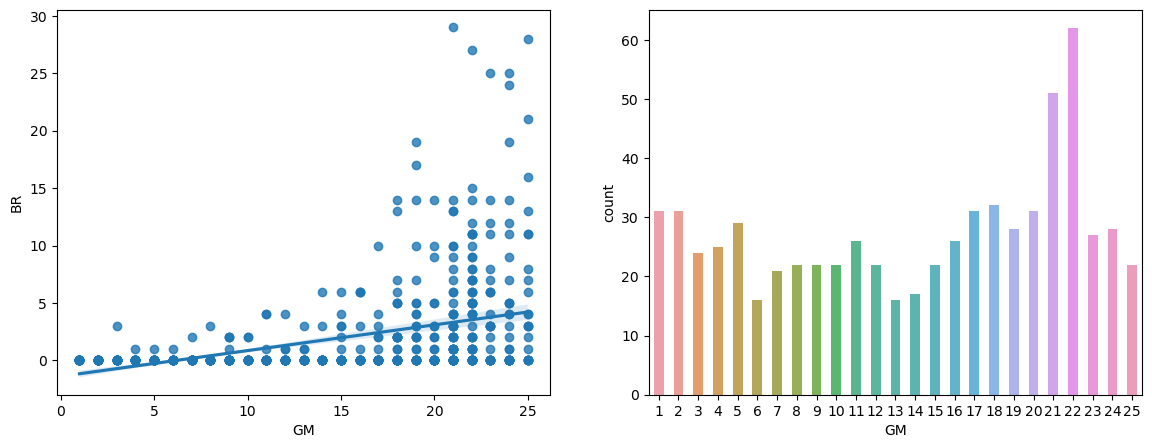

In [438]:
plt.figure(figsize=(14,5))
ax1= plt.subplot(1,2,1)
sns.regplot(x=data['GM'], y=data['BR'])

ax2= plt.subplot(1,2,2)
sns.countplot(x="GM", data=data, width= 0.5, alpha= 0.9, ax=ax2)


## TM
data type is object, there are 18 teams.


<Axes: xlabel='BR', ylabel='TM'>

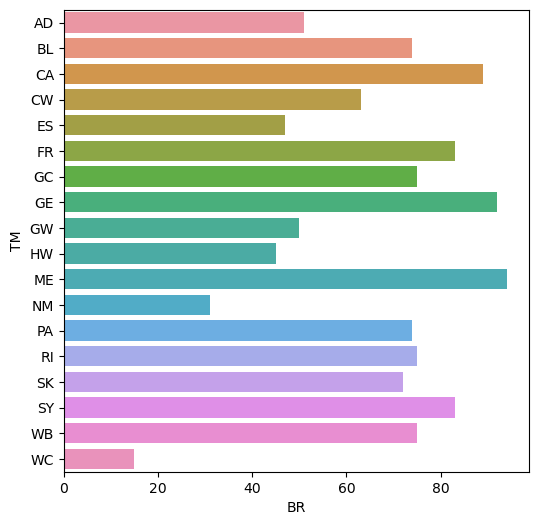

In [439]:
# The total number of votes each club had

plt.figure(figsize=(6, 6))
sns.barplot(x=data.groupby(['TM'])['BR'].sum(), y=data.groupby(['TM'])['BR'].sum().index)

## Other features

They are all float type and different things a player could do in a match. 

From the plot, we can see some stats might be more important and some might be insignificant because they regression line can show us a bit about the strength of linear relationship between those features and BR votes.

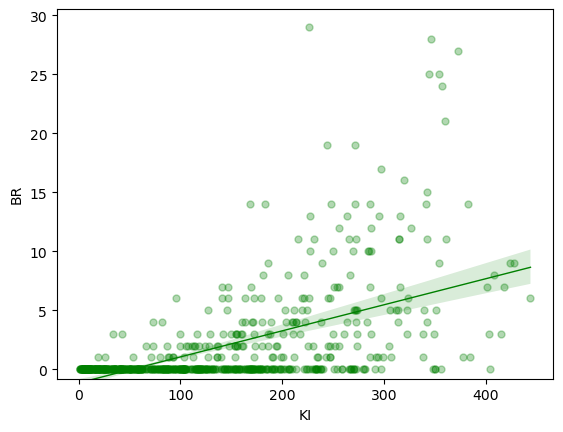

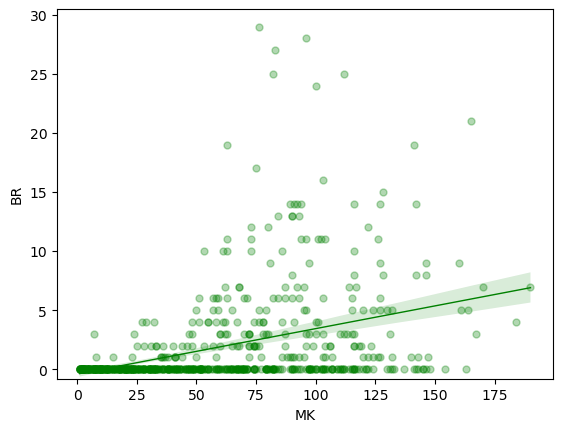

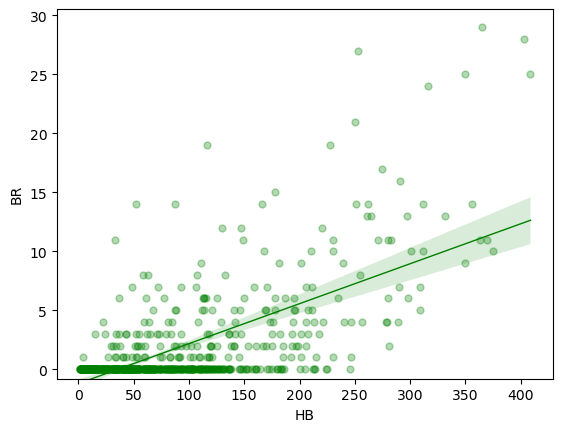

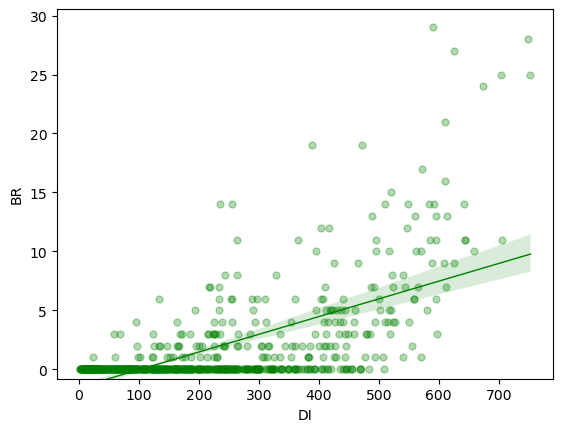

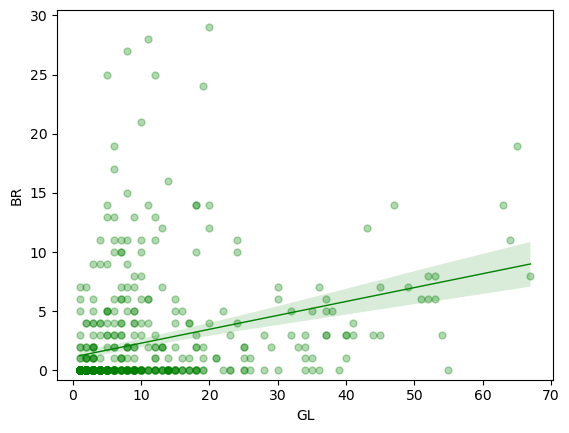

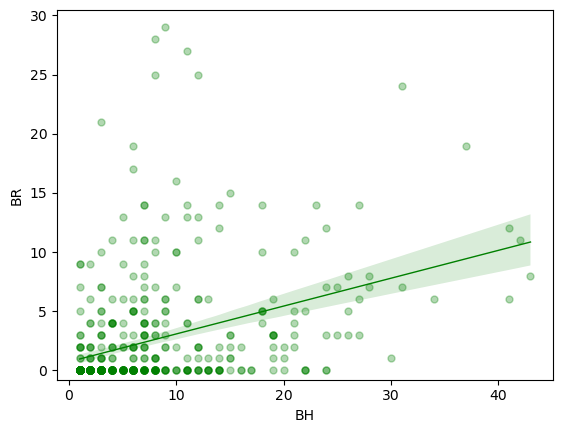

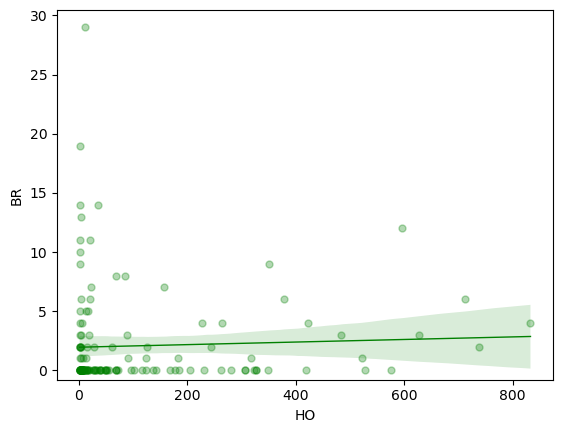

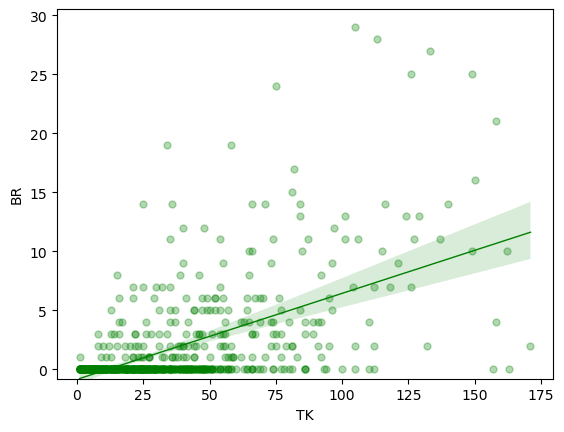

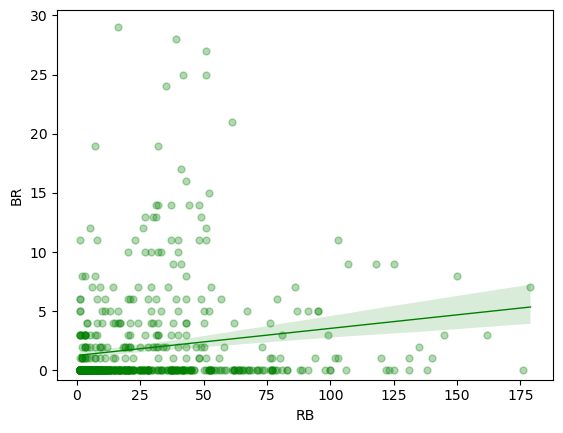

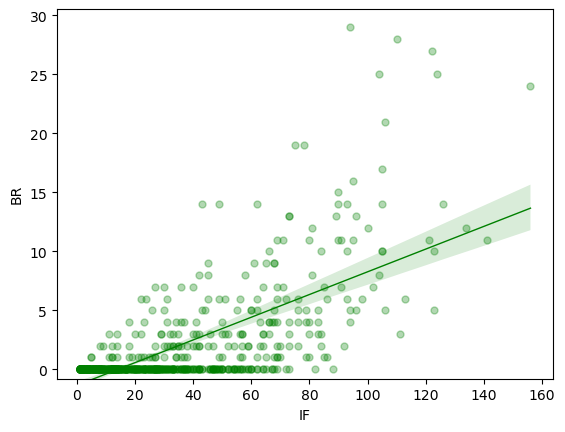

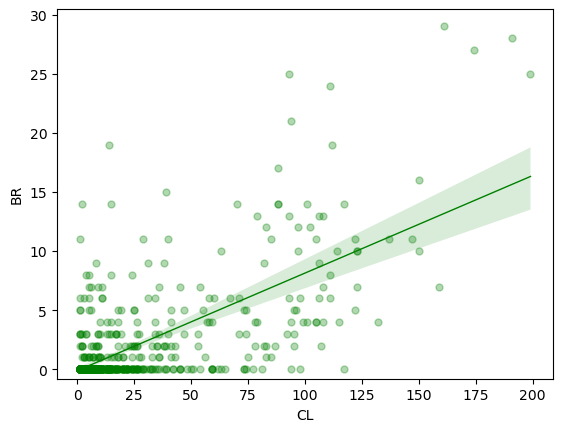

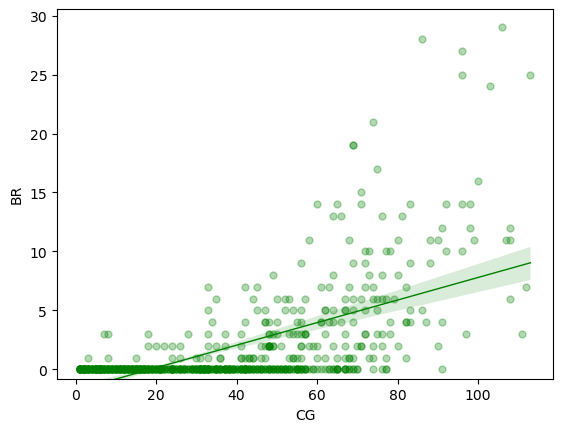

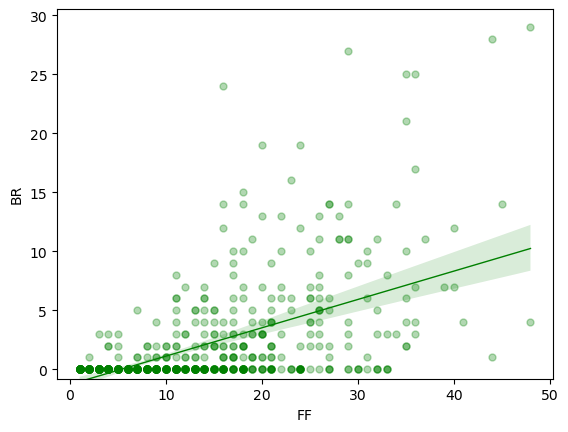

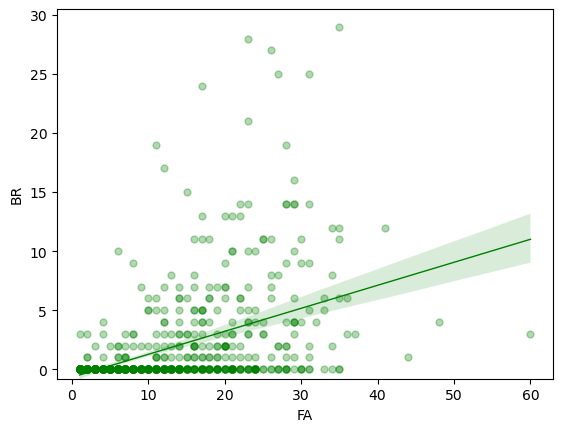

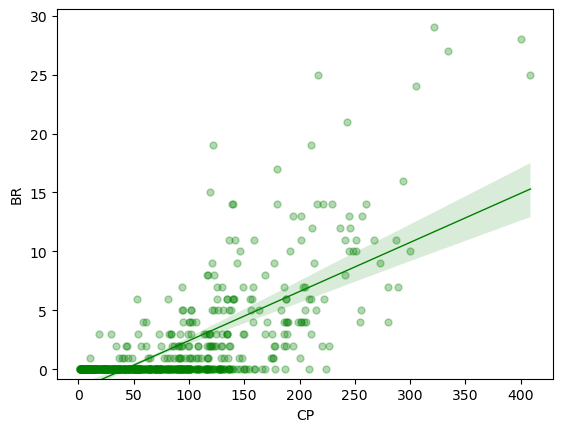

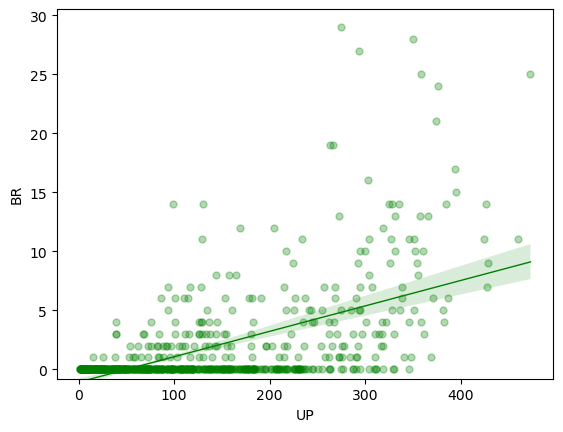

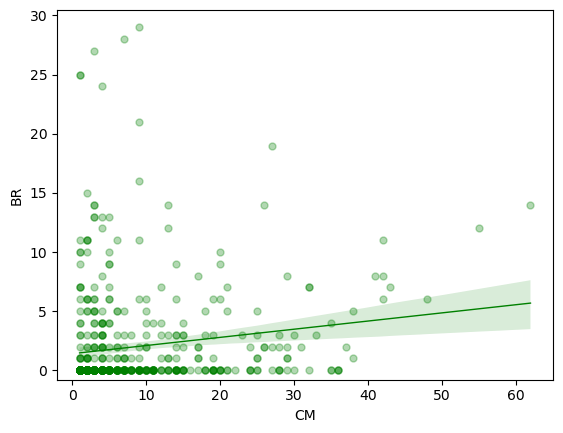

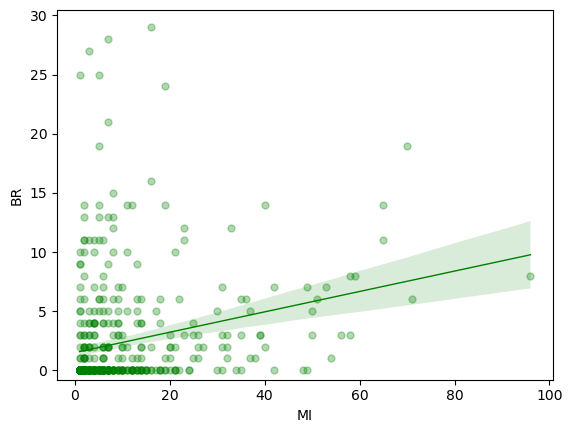

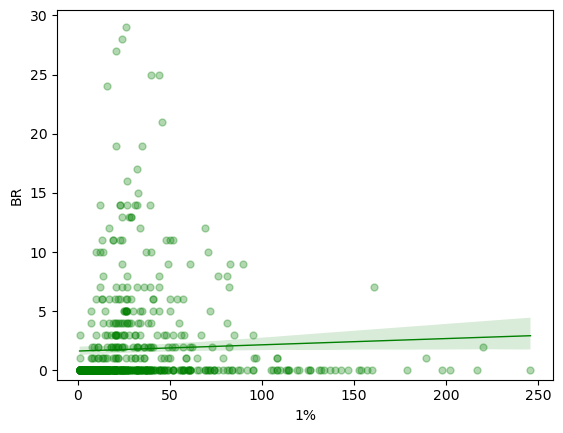

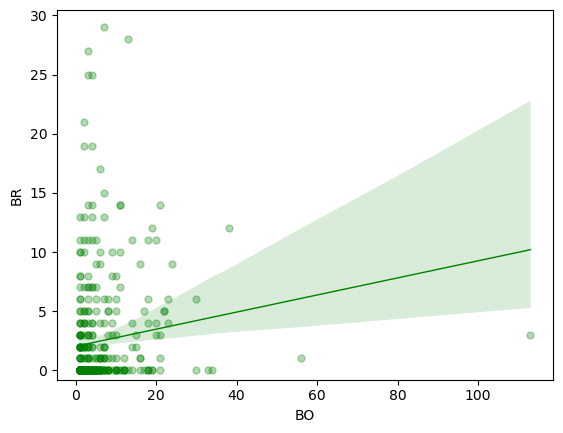

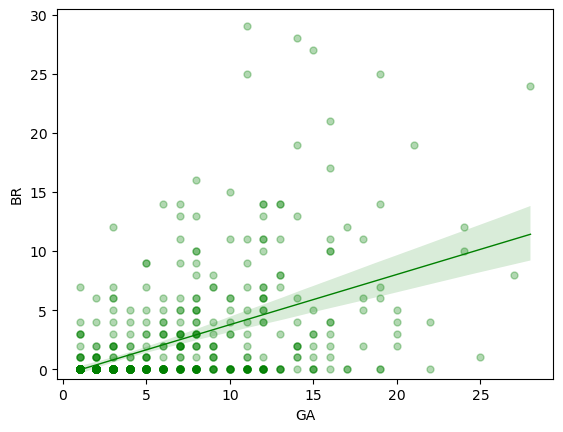

In [440]:
columns_plot =  [x for x in data.columns if x not in ["TM", "GM", "BR"]]
for column in columns_plot:
    cl = "green"
    sns.regplot(x=data[column], y=data['BR'], color = cl, scatter_kws={'alpha':0.3, 's': 25}, line_kws={'linewidth':1})
    plt.xlabel(column)
    plt.ylabel('BR')
    plt.ylim(bottom= -0.8)  

    plt.show()
    plt.close()


- 1%, HO have weak linear relationship to BR votes
- MI, BH, RB, CM, MI, GL do not have clear linear relationship to BR and they seems not to have any strong relationship.
- BO, FA has an outlier that might strongly affect the plot. From the below plot, we cannot say BO can have a strong relationship to BR, however, FA might be still positively correlated to BR.
- CP, CG, CL, DI, HB, KI may have strong positive relationship to BR 

<Axes: xlabel='FA', ylabel='BR'>

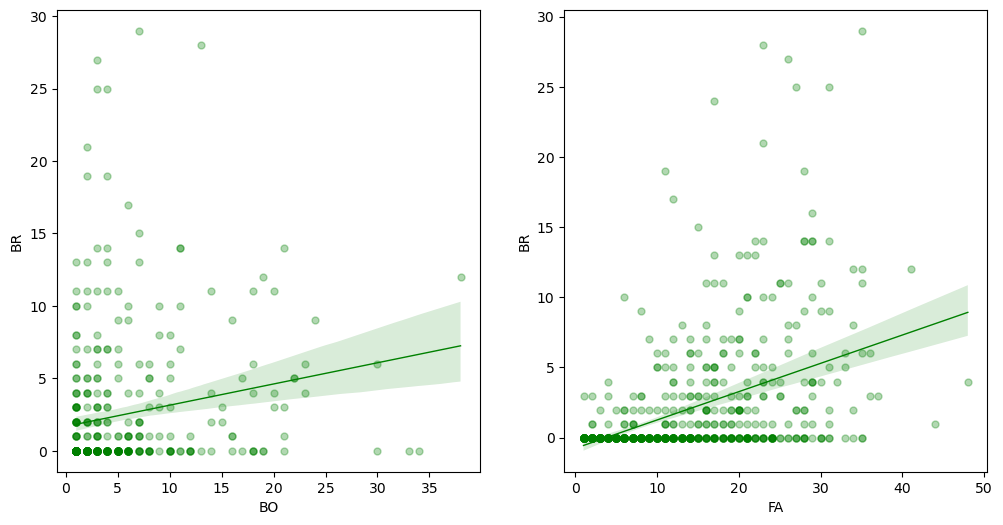

In [441]:
# Plot BO and FA after removing outlier
plt.figure(figsize=(12,6))
ax1=plt.subplot(1,2,1)
sns.regplot(x=data.loc[data['BO'] < 40]['BO'], y=data.loc[data['BO'] < 40]['BR'], color = cl, scatter_kws={'alpha':0.3, 's': 25}, line_kws={'linewidth':1},ax=ax1)

ax2=plt.subplot(1,2,2)
sns.regplot(x=data.loc[data['FA'] < 50]['FA'], y=data.loc[data['FA'] < 50]['BR'], color = cl, scatter_kws={'alpha':0.3, 's': 25}, line_kws={'linewidth':1},ax=ax2)

## Correlation

From the correlation matrix, it enhances our observation from previous part:
- Most well BR-corelated features: IF, CL, CG, CP (over 0,6)
- Lowest correlated features: HO, RB, CM, MI, 1%, BO (under 0.3)
- Other features's values vary between 0.3 - 0.59
- There are many inter-relationship between each feature to others.

In [442]:
corr_cols = columns_plot + ['GM', 'BR']
print(corr_cols)

['KI', 'MK', 'HB', 'DI', 'GL', 'BH', 'HO', 'TK', 'RB', 'IF', 'CL', 'CG', 'FF', 'FA', 'CP', 'UP', 'CM', 'MI', '1%', 'BO', 'GA', 'GM', 'BR']


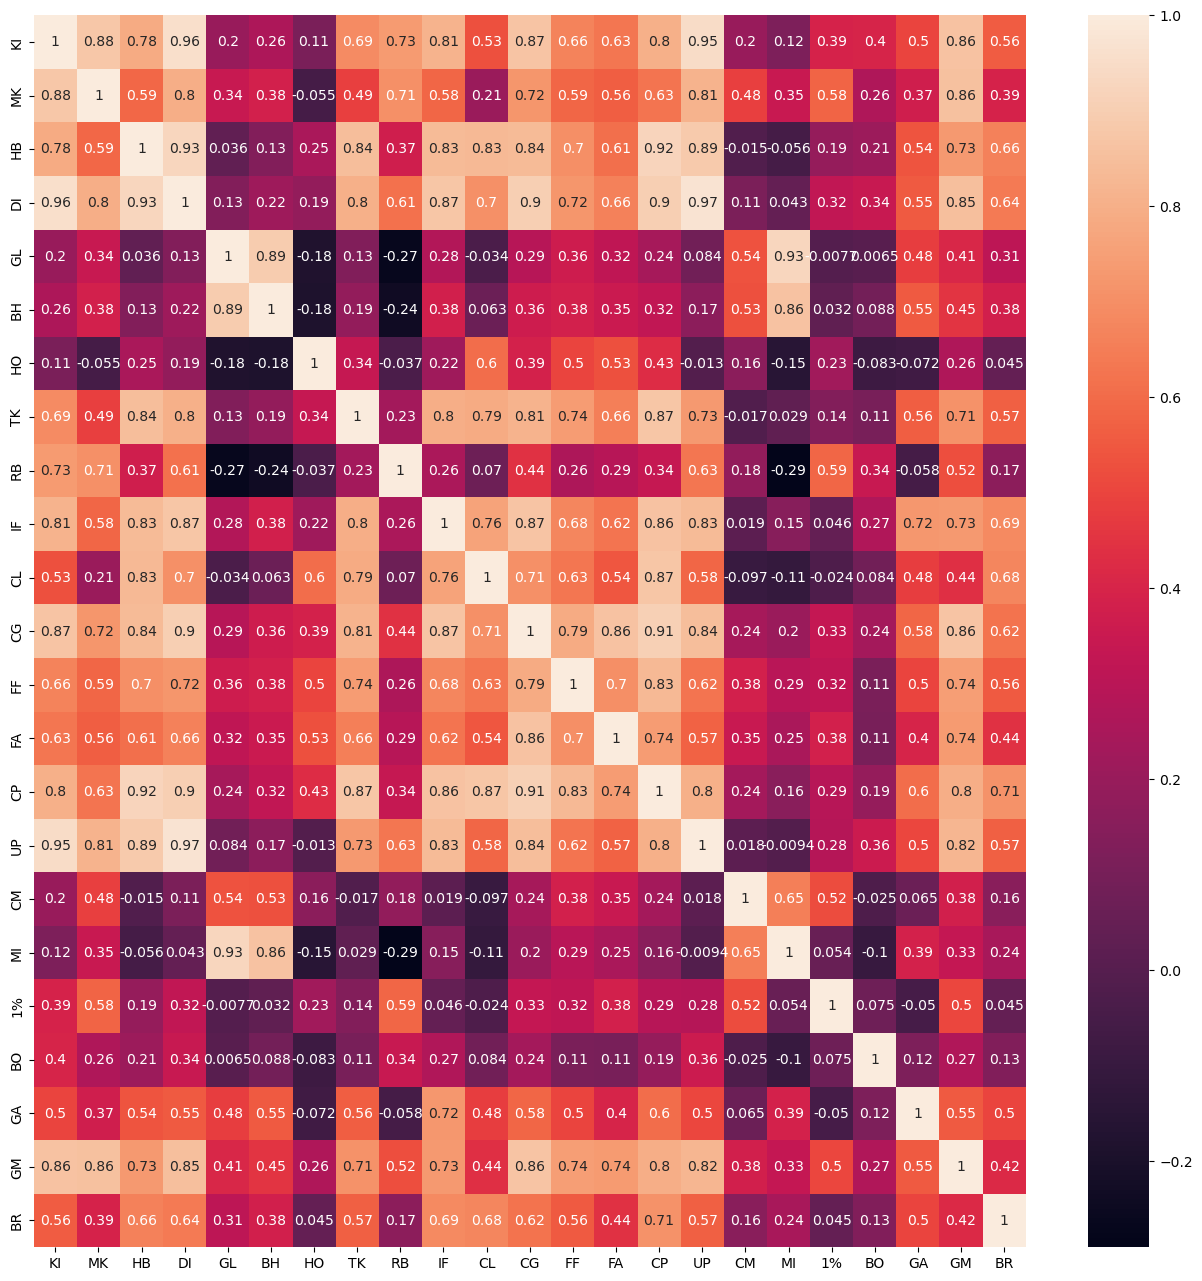

In [443]:
corr= data[corr_cols].corr()
plt.figure(figsize= (16, 16))
sns.heatmap(corr, annot=True)
plt.show()

## Data Preprocessing

From the dataset, there are many players who did not play in many matches and their data is almost full of Nan values or looks quite similar to each other, so the data is not significant. We will resample the data to improve dataset and decrease its imbalance.

<Axes: xlabel='BR', ylabel='Count'>

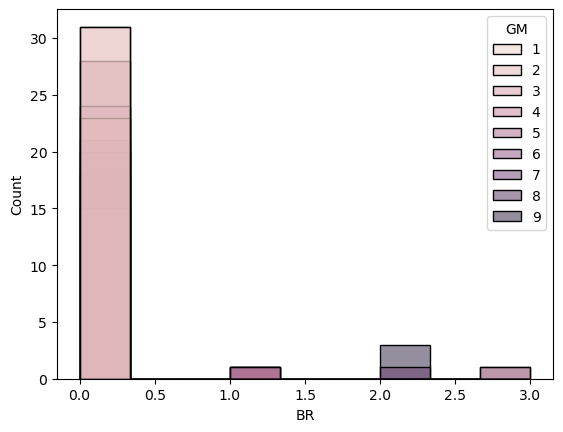

In [444]:
data_low = data.loc[data['GM'] < 10]
sns.histplot(x='BR', hue='GM', data=data_low)

In [445]:
# emit all player who play less than 7 matches
data = data.loc[data['GM'] >= 7]

# since BR is only considered in 22 first games, we should only set the maximum values of GM is 22
data['GM for BR'] = data['GM'].apply(lambda x: 22 if x > 22 else x)

### Imputation

The number of missing values change after we resampled the dataset. It is because most missing values happened in players who did not play much. 

In [446]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
TM             0
GM             0
KI             0
MK             0
HB             0
DI             0
GL            82
BH            99
HO           416
TK             0
RB            19
IF             0
CL            12
CG             0
FF             2
FA             2
BR             0
CP             0
UP             0
CM            61
MI           106
1%             0
BO           156
GA            52
GM for BR      0
dtype: int64


#### GL

GL has none of the value of zero. We find this is weird since there should be defense players whose duty was not scoring. We find out that the mean of RB values for missing GL dataset is much higher than the mean of RB in the whole dataset. It could mean that players who focused on defesing, catching ball after opponents missed scoring tend to have missing GL. 

Therefore, we decide to imputation the missing values by 0.

In [447]:
data['GL'].value_counts()

1.0     54
3.0     45
2.0     39
5.0     32
4.0     31
6.0     24
9.0     24
8.0     20
7.0     19
10.0    14
12.0    13
14.0    10
11.0    10
18.0    10
13.0     9
15.0     9
17.0     6
25.0     5
16.0     5
19.0     5
37.0     4
34.0     4
20.0     4
24.0     3
40.0     3
35.0     3
23.0     3
30.0     3
53.0     2
22.0     2
26.0     2
21.0     2
32.0     2
28.0     2
45.0     2
52.0     2
36.0     2
41.0     2
38.0     1
44.0     1
39.0     1
55.0     1
63.0     1
65.0     1
29.0     1
47.0     1
51.0     1
64.0     1
54.0     1
67.0     1
43.0     1
49.0     1
33.0     1
Name: GL, dtype: int64

In [448]:
print("Mean of RB in missing GL dataset")
print(data.loc[data['GL'].isnull() == True]['RB'].mean())

print("Mean of RB in the whole dataset")
print(data['RB'].mean())

Mean of RB in missing GL dataset
49.207317073170735
Mean of RB in the whole dataset
31.141453831041257


In [449]:
# Imputation by 0
data['GL'] = data['GL'].fillna(0)

#### TK, RB, CL, CG, FF, FA

Those features do not have the value of 0, and they do not have many missing values. Therefore, we also impute them by 0.

In [450]:
for col in ['TK', 'RB', 'CL', 'CG', 'FF', 'FA']:
    print(0.0 in data[col].value_counts().sort_index().index)

False
False
False
False
False
False


In [451]:
# Imputation by 0
data[['TK', 'RB', 'CL', 'CG', 'FF', 'FA']] = data[['TK', 'RB', 'CL', 'CG', 'FF', 'FA']].fillna(0)

#### BH, HO, MI, BO, GA

Again, there are no 0 in the dataset. We believe there should be some zero values. We cannot impute with mean since each position in the field can have different trend of stats, imputation by mean can lead to seriously false reflection of the actual world. We cannot impute by the most frequent values either because they already dominates the distribution.

Therefore, we will impute by 0 as it is not normal when all zero values are missing and it is sensible that there are many players who did not have any stat in those features.

We also want to remove outlier in BO and MI.

In [452]:
for col in ['BH','HO', 'MI', 'BO', 'GA']:
    print(0.0 in data[col].value_counts().sort_index().index)

False
False
False
False
False


<Axes: xlabel='GA', ylabel='Count'>

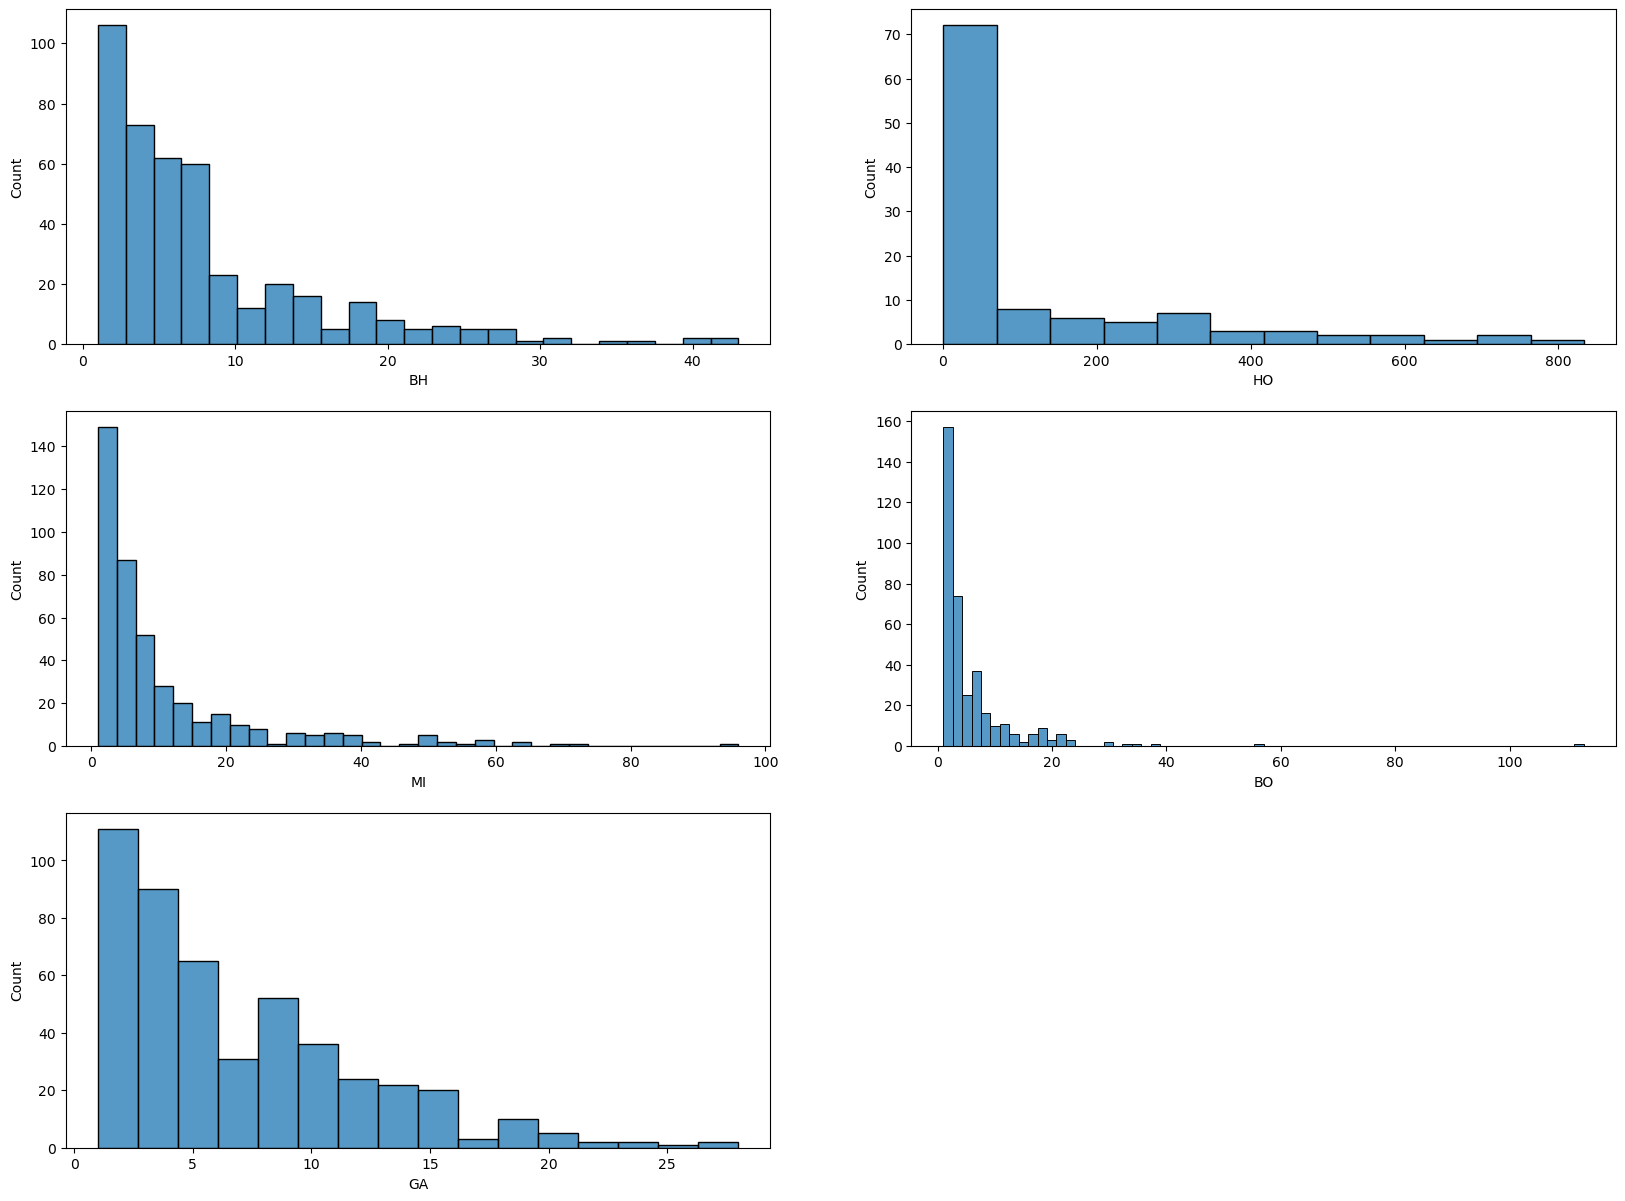

In [453]:
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
sns.histplot(data['BH'], ax=ax1)

ax2 = plt.subplot(4,2,2)
sns.histplot(data['HO'], ax=ax2)

ax3 = plt.subplot(4,2,3)
sns.histplot(data['MI'], ax=ax3)

ax4 = plt.subplot(4,2,4)
sns.histplot(data['BO'], ax=ax4)

ax5 = plt.subplot(4,2,5)
sns.histplot(data['GA'], ax=ax5)


In [454]:
# Imputation
data = data.fillna(0)

In [455]:
# Remove outlier
data = data.loc[data['FA'] < 50]
data = data.loc[data['BO'] < 40]
data = data.loc[data['MI'] < 80]

### Data processing after deciding which model to use

- We know that there are many linear relationship between each feature, so we do not want to use Linear Regression. Therefore, we will use KNN to predict BR.
- As we know, BR votes were only considered in 22 matches and we do not want to remove all rows having GM higher than 22. We decide to change our dataset to mean dataset.

In [456]:
for column in data.columns:

    # divide all stats of each players by games played to standardize data
    if column == 'BR':
        data[column] = data[column] / data['GM for BR']
    elif column in ['TM', 'GM', 'GM for BR']:
        continue
    else:
        data[column] = data[column] / data['GM']
        
    data[column] = data[column].apply(lambda x: round(x, 2))

data.sort_values(by = ['BR'], ascending = False)    


,TM,GM,KI,MK,HB,DI,GL,BH,HO,TK,...,FA,BR,CP,UP,CM,MI,1%,BO,GA,GM for BR
Player,,,,,,,,,,,,,,,,,,,,,
"Cripps, Patrick",CA,21,10.76,3.62,17.38,28.14,0.95,0.43,0.52,5.00,...,1.67,1.38,15.33,13.10,0.43,0.76,1.24,0.33,0.52,21
"Neale, Lachie",BL,25,13.84,3.84,16.12,29.96,0.44,0.32,0.00,4.52,...,0.92,1.27,16.00,14.00,0.28,0.28,0.96,0.52,0.56,22
"Miller, Touk",GC,22,16.95,3.77,11.50,28.45,0.36,0.50,0.00,6.05,...,1.18,1.23,15.18,13.32,0.14,0.14,0.95,0.14,0.68,22
"Oliver, Clayton",ME,23,14.96,3.57,17.78,32.74,0.22,0.35,0.00,5.48,...,1.17,1.14,17.78,15.57,0.04,0.04,1.74,0.13,0.83,22
"Brayshaw, Andrew",FR,24,14.75,4.67,14.58,29.33,0.50,0.50,0.00,6.21,...,1.29,1.14,9.04,19.71,0.04,0.21,1.83,0.17,0.46,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Hickey, Tom",SY,16,7.50,3.06,7.19,14.69,0.19,0.12,21.75,1.62,...,1.88,0.00,10.00,5.44,0.88,0.25,2.75,0.00,0.25,16
"Frederick, Michael",FR,22,7.00,3.36,3.86,10.86,1.27,0.64,0.00,2.32,...,0.45,0.00,3.32,7.68,0.18,0.68,0.68,0.45,0.50,22
"Fox, Robbie",SY,14,11.07,5.36,6.14,17.21,0.00,0.07,0.00,2.07,...,0.43,0.00,4.71,12.07,0.21,0.07,3.21,0.21,0.07,14


### Create binn for KNN

Since the dataset is imbalanced and BR votes are competitive, we will decide bins by our knowledge.

<Axes: xlabel='BR', ylabel='Count'>

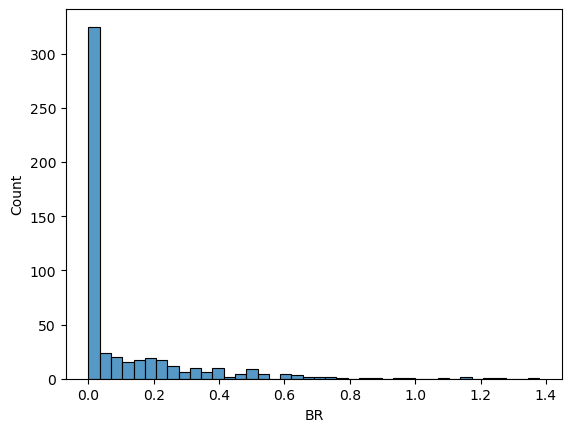

In [457]:
sns.histplot(data['BR'])

In [458]:
binn = []
for point in data['BR']:
    if point >= 0.7:
        binn.append(3)
    elif 0.4 <= point < 0.7:
        binn.append(2)
    elif 0.1 <= point < 0.4:
        binn.append(1)
    else:
        binn.append(0)


data['binned_BR'] = binn
data

,TM,GM,KI,MK,HB,DI,GL,BH,HO,TK,...,BR,CP,UP,CM,MI,1%,BO,GA,GM for BR,binned_BR
Player,,,,,,,,,,,,,,,,,,,,,
"Oliver, Clayton",ME,23,14.96,3.57,17.78,32.74,0.22,0.35,0.00,5.48,...,1.14,17.78,15.57,0.04,0.04,1.74,0.13,0.83,22,3
"Neale, Lachie",BL,25,13.84,3.84,16.12,29.96,0.44,0.32,0.00,4.52,...,1.27,16.00,14.00,0.28,0.28,0.96,0.52,0.56,22,3
"Macrae, Jack",WB,23,14.87,4.17,15.78,30.65,0.17,0.17,0.00,3.78,...,0.50,11.61,20.00,0.09,0.13,2.17,0.17,0.78,22,2
"Brayshaw, Andrew",FR,24,14.75,4.67,14.58,29.33,0.50,0.50,0.00,6.21,...,1.14,9.04,19.71,0.04,0.21,1.83,0.17,0.46,22,3
"Petracca, Christian",ME,24,14.88,4.17,13.17,28.04,0.79,1.29,0.00,3.12,...,1.09,12.71,15.67,0.17,0.79,0.67,0.00,1.17,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Stein, Jake",GW,9,3.67,2.00,2.44,6.11,0.11,0.00,0.00,1.22,...,0.00,2.44,3.78,0.22,0.22,3.89,0.00,0.11,9,0
"Hayes, Sam",PA,7,3.57,1.57,4.14,7.71,0.00,0.00,29.29,1.29,...,0.00,5.43,3.29,0.14,0.00,3.43,0.00,0.14,7,0
"Gollant, Lachlan",AD,7,5.14,3.29,2.43,7.57,1.00,0.86,0.00,0.71,...,0.00,3.14,4.29,0.57,1.29,1.43,0.00,0.29,7,0


### One-hot encoding

For TM

In [459]:
data=pd.get_dummies(data = data,
                       prefix = ['TM'],
                       columns = ['TM'])

## Training model

In [460]:
X = data.drop(['GM', 'BR', 'binned_BR'], axis=1)
y = data['binned_BR']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Distribution of train-test classes:')
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

Distribution of train-test classes:
0    290
1     95
2     21
3     13
Name: binned_BR, dtype: int64
0    72
1    20
2    11
3     2
Name: binned_BR, dtype: int64


Because the dataset is imbalanced, we will use Cross-Validation to evaluate and choose the best model.

### Choose K
By using 0.2 of train dataset to train model to find the best k, it turns out k = 3 (odd number) gives the best result. 

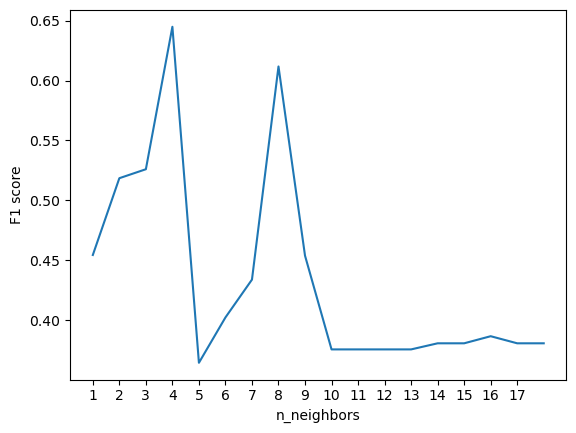

In [461]:
# Split the data into a smaller subset for finding best n_neighbors

X_subset, X_test_subset, y_subset, y_test_subset = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

possible_k = []
f1s = []

for i in range(int(np.sqrt(len(X_subset)))):
    
    # Training
    knnfork = KNeighborsClassifier(n_neighbors=i+1)
    knnfork.fit(X_subset, y_subset)    

    # Predictions
    y_sub_pred = knnfork.predict(X_test_subset)
    f1s.append(f1_score(y_test_subset, y_sub_pred, average='macro'))
    possible_k.append(i+1)

# Plot

plt.plot(possible_k, f1s)
plt.xlabel("n_neighbors")
plt.ylabel("F1 score")
plt.xticks(range(1, len(possible_k)))
plt.show()
plt.close()


# Train without feature selection


In [462]:
# Create folds
n = 5
nf_CV = StratifiedKFold(n_splits=n, shuffle=True, random_state=42)

# Store scores for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
max_score1 = 0

for train_idx, test_idx in nf_CV.split(X_train,y_train):

    # Take corresponding dataset
    X_ftrain, X_ftest = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_ftrain, y_ftest = y_train.iloc[train_idx], y_train.iloc[test_idx] 

    # Training
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_ftrain, y_ftrain)    

    # Predictions and model scores
    y_fpred = model.predict(X_ftest)
    accuracies.append(accuracy_score(y_ftest, y_fpred))
    recalls.append(recall_score(y_ftest, y_fpred, average='macro',zero_division=0))
    precisions.append(precision_score(y_ftest, y_fpred, average='macro', zero_division=0))
    f1s.append(f1_score(y_ftest, y_fpred, average='macro'))
    
    score = recall_score(y_ftest, y_fpred, average='macro',zero_division=0)
    if score > max_score1:
        max_score1 = score
        model_without_fs = model

# Find the mean of each
print(f"Average Accuracy: {round(np.mean(accuracies), 2)}")
print(f"Average Recall: {round(np.mean(recalls), 2)}")
print(f"Average Precision: {round(np.mean(precisions), 2)}")
print(f"Average F1: {round(np.mean(f1s), 2)}")


Average Accuracy: 0.75
Average Recall: 0.45
Average Precision: 0.52
Average F1: 0.47


# Train model with recursive feature selection
Running the model many times. Each time, a feature is added, using f1 score to evaluate the performance of model.

We create 5 folds and do recursive feature selection in each fold. Each plot shows how the number of features used to train the model affects the f1 score. Then for each fold, we store the best model, the features giving the highest score, and the score.

By looking at the plot, we can see that there are some groups of features that can give quite good prediction. Moreover, as we add the feature based on its level of strong correlation to binned_BR (the lower correlation of a feature is, the later it is added), we can see the tail trend scores are not much higher than the head trend in each plot. In other words, those later added features might not be strong predictor for BR.

Although the first 6 features: ['CP', 'IF', 'CL', 'DI', 'CG', 'HB'] show that they are very strong predictor for BR, we cannot conclude that the six features are biased since the dataset is imbalanced, so overfitting might happen. What we can only see here is that those six are good features.




Max f1 score: 0.6867543738806998
Features: ['CP', 'IF', 'CL', 'DI', 'CG', 'HB']


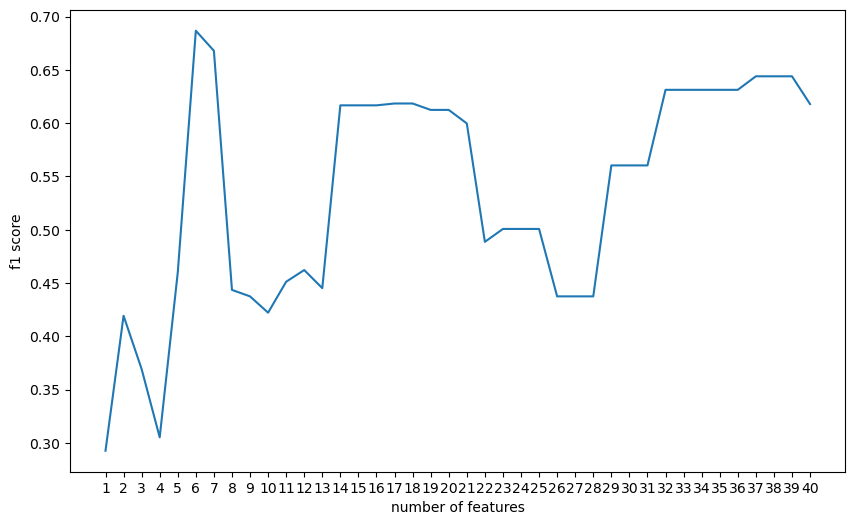

Max f1 score: 0.4830139372822299
Features: ['CP', 'DI', 'IF']


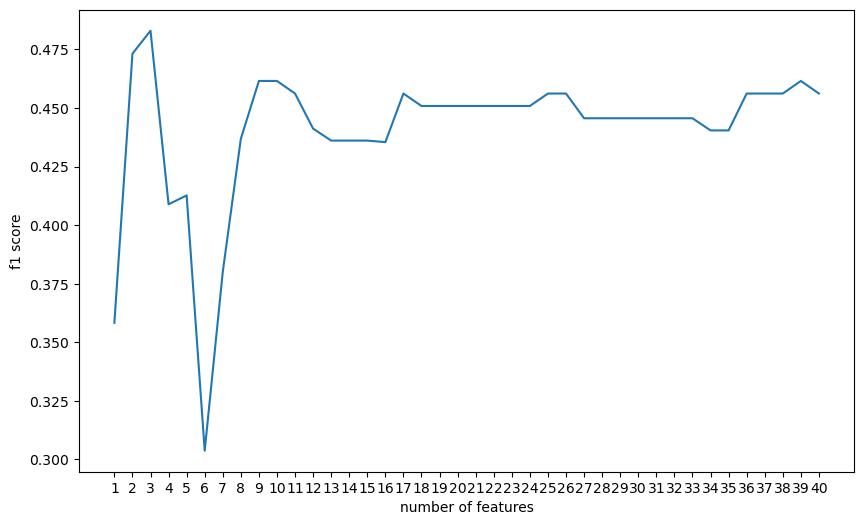

Max f1 score: 0.5137368300503894
Features: ['CP', 'IF', 'CG', 'DI', 'CL', 'HB', 'FF', 'KI', 'GA', 'UP', 'TK', 'BH', 'GL', 'GM for BR', 'MI', 'FA', 'BO', 'MK', 'TM_RI', 'CM', 'TM_FR', 'TM_GE', 'TM_SY', 'TM_GC', 'TM_CW']


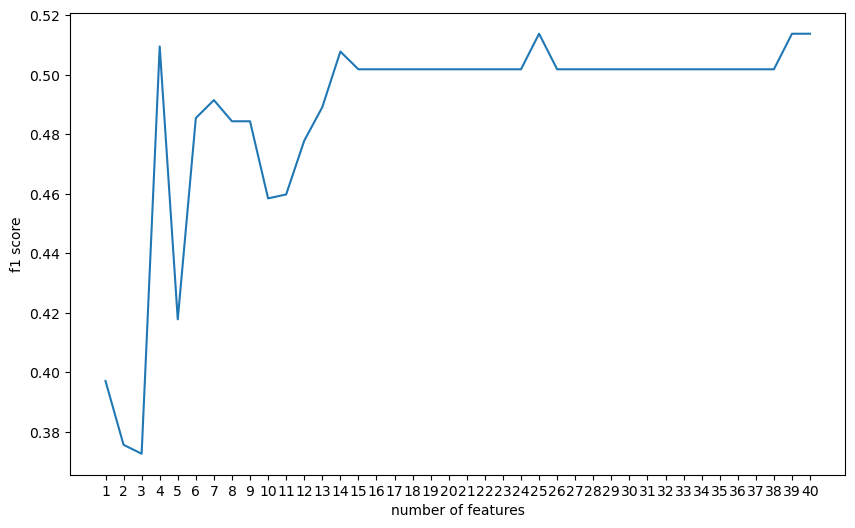

Max f1 score: 0.40833636253483585
Features: ['CP', 'IF']


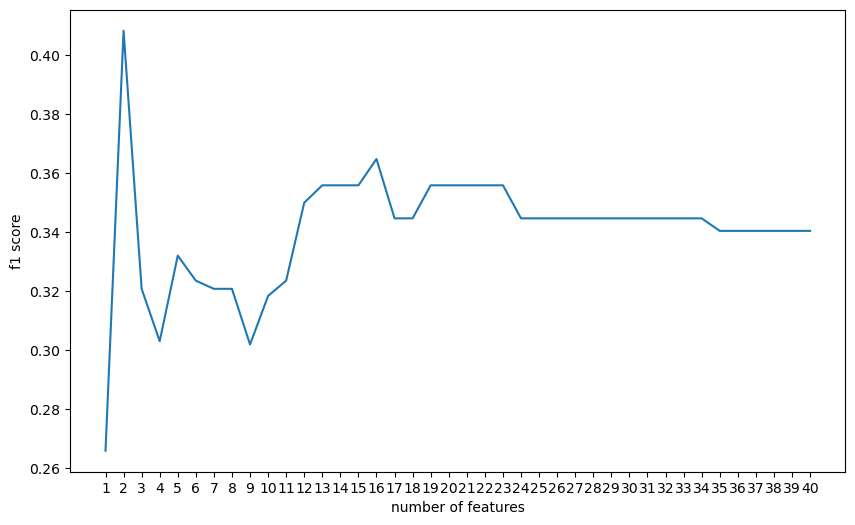

Max f1 score: 0.47595135615221695
Features: ['CP', 'IF', 'CL', 'DI', 'CG']


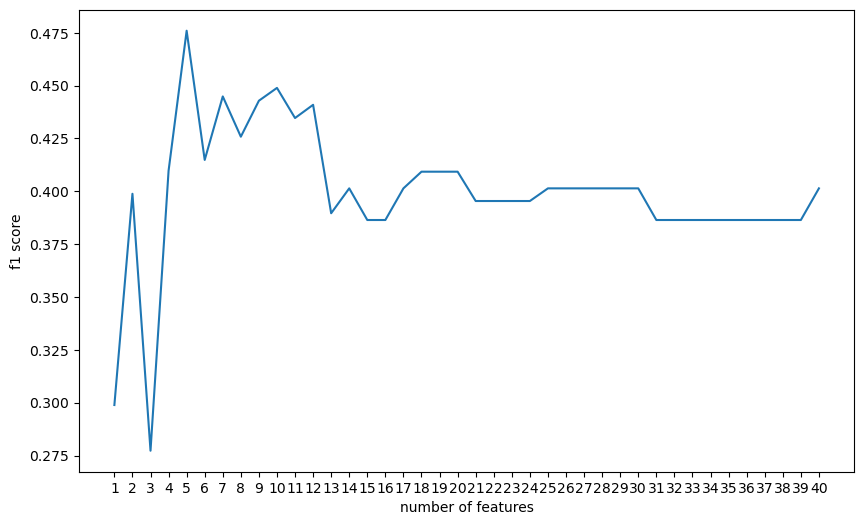

In [463]:
# Create folds
n = 5
nf_CV = StratifiedKFold(n_splits=n, shuffle=True, random_state=42)

# Store scores, features, model for each fold
best_features_group = []
max_score_group = []
best_model_group = []

for train_idx, test_idx in nf_CV.split(X_train,y_train):
    
    # Take corresponding dataset
    X_ftrain, X_ftest = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_ftrain, y_ftest = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    
    # calculate pearson correlation coefficients of features to BR
    pear_df = pd.concat([X_ftrain, pd.DataFrame(y_ftrain, columns=['binned_BR'])], axis=1).corr(method='pearson')
    pear_df = pear_df.loc['binned_BR']
    
    desc_fea = pear_df.sort_values(ascending=False).index
    desc_fea = list(desc_fea[1:])
    
    list_score = []
    store_features = []
    max_score = 0 
    
    for i in range(len(desc_fea)):        

        # Extract features and new dataset
        selector = desc_fea[:i+1]
        X_train_new = X_ftrain[selector]
        X_test_new = X_ftest[selector]

        # Train a KNN classifier on the reduced feature set
        clf = KNeighborsClassifier(n_neighbors=3)
        clf.fit(X_train_new, y_ftrain)
        y_fpred = clf.predict(X_test_new)

        # Model score
        score = f1_score(y_ftest, y_fpred, average='macro')
        if score > max_score:
            max_score = score
            best_model = clf
            best_feature = selector

            
        list_score.append(score)
#         store_features.append(selector)

    print(f"Max f1 score: {max_score}") 
    print(f"Features: {best_feature}")
    
    best_features_group.append(best_feature)
    max_score_group.append(max_score)
    best_model_group.append(best_model)
    
    # Plot
    
    plt.figure(figsize=(10,6))
    x_axis = list(range(1,len(list_score)+1))
    plt.plot(x_axis, list_score)
    plt.xticks(range(1,len(list_score)+1), x_axis)
    plt.xlabel("number of features")
    plt.ylabel("f1 score")
    plt.show()
    plt.close()

    




This is for the reverse order of features. It would be useful to support to answer our research question.

We can see the performance of model at the beginning is low. It supports our previous argument that some features are low-informative, as long as we add more 'good' features, the performance gets better.

All plot have the same partter which it increases sharply at around 32-34 features.
Again, it supports our previous observation and may tell us that some features such as ['1%', 'RB', 'TM' ,'HO', 'CM', 'BO'] are not significant to BR decision.



Max f1 score: 0.617921146953405
Features: ['1%', 'TM_WC', 'TM_NM', 'RB', 'TM_AD', 'TM_HW', 'TM_PA', 'TM_GC', 'TM_GW', 'TM_BL', 'TM_WB', 'HO', 'TM_ES', 'TM_ME', 'TM_SY', 'TM_FR', 'TM_CW', 'TM_SK', 'TM_CA', 'CM', 'TM_GE', 'MK', 'TM_RI', 'BO', 'MI', 'FA', 'GM for BR', 'GL', 'BH', 'GA', 'TK', 'UP', 'KI', 'FF', 'HB', 'CG', 'DI', 'CL', 'IF', 'CP']


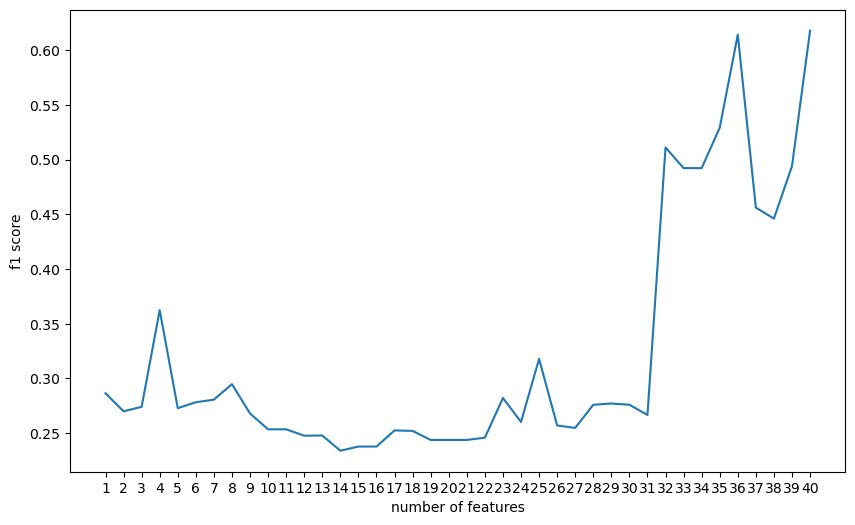

Max f1 score: 0.6019787644787645
Features: ['1%', 'TM_NM', 'TM_WC', 'TM_ES', 'RB', 'TM_PA', 'TM_HW', 'TM_AD', 'TM_WB', 'TM_ME', 'HO', 'TM_GW', 'TM_RI', 'TM_BL', 'TM_CW', 'TM_GC', 'TM_SK', 'TM_GE', 'TM_FR', 'TM_SY', 'TM_CA', 'CM', 'BO', 'MK', 'MI', 'FA', 'GL', 'GA', 'BH', 'GM for BR', 'FF', 'UP']


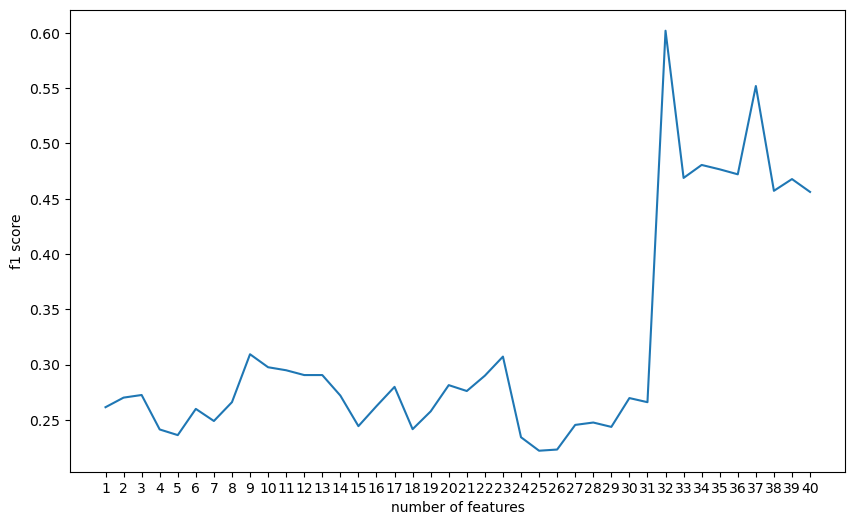

Max f1 score: 0.6071358748778104
Features: ['1%', 'RB', 'TM_WC', 'TM_NM', 'TM_PA', 'TM_CA', 'TM_HW', 'HO', 'TM_AD', 'TM_WB', 'TM_SK', 'TM_ES', 'TM_GW', 'TM_ME', 'TM_BL', 'TM_CW', 'TM_GC', 'TM_SY', 'TM_GE', 'TM_FR', 'CM', 'TM_RI', 'MK', 'BO', 'FA', 'MI', 'GM for BR', 'GL', 'BH', 'TK', 'UP']


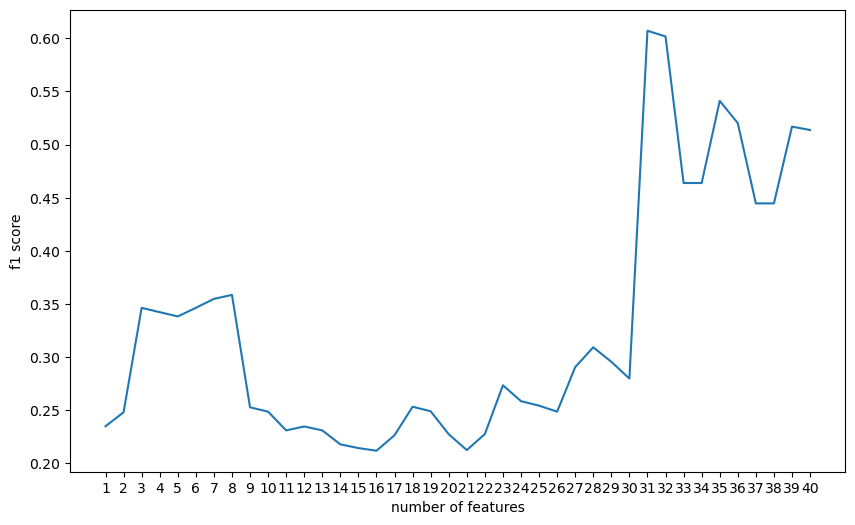

Max f1 score: 0.39822616407982264
Features: ['1%', 'TM_WC', 'TM_NM', 'TM_ME', 'TM_BL', 'RB', 'TM_AD', 'TM_HW', 'TM_PA', 'HO', 'TM_ES', 'TM_GW', 'TM_GC', 'TM_CW', 'TM_WB', 'TM_FR', 'TM_SK', 'TM_SY', 'TM_CA', 'TM_RI', 'TM_GE', 'CM', 'BO', 'MK', 'MI', 'FA', 'GL', 'BH', 'GM for BR', 'GA', 'TK', 'UP']


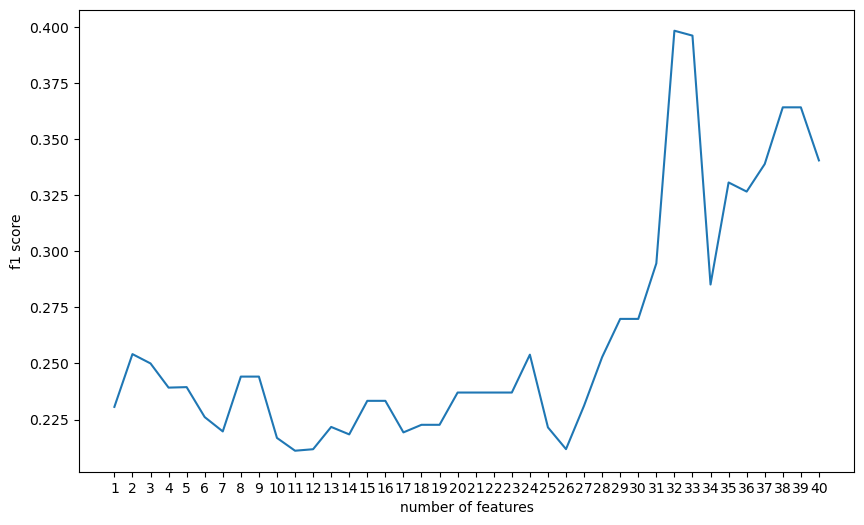

Max f1 score: 0.5657380254154447
Features: ['1%', 'TM_WC', 'RB', 'TM_NM', 'TM_HW', 'TM_WB', 'TM_SY', 'TM_GC', 'TM_SK', 'TM_PA', 'TM_AD', 'TM_BL', 'TM_ES', 'CM', 'TM_GW', 'HO', 'TM_ME', 'TM_CW', 'TM_CA', 'TM_FR', 'TM_GE', 'TM_RI', 'MK', 'BO', 'MI', 'FA', 'GL', 'GM for BR', 'BH', 'GA', 'FF', 'KI', 'TK']


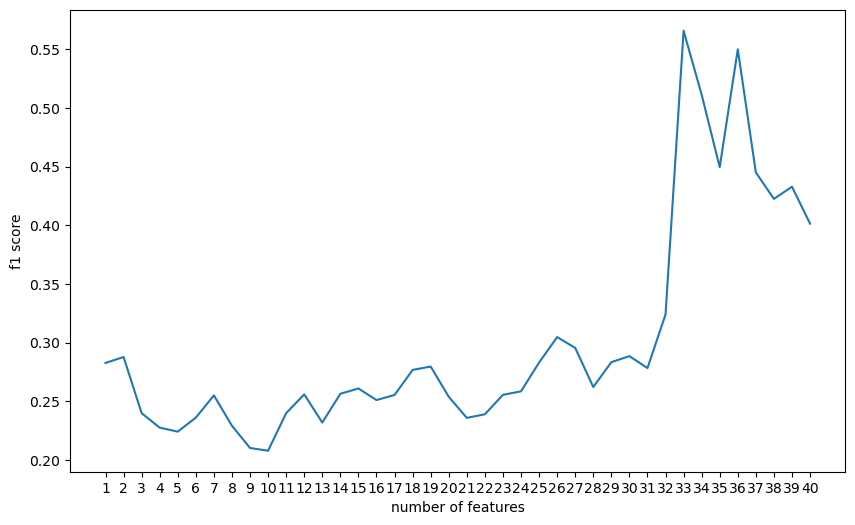

In [464]:
# Create folds
n = 5
nf_CV = StratifiedKFold(n_splits=n, shuffle=True, random_state=42)



# Store scores for each fold
for train_idx, test_idx in nf_CV.split(X_train,y_train):
    
    # Take corresponding dataset
    X_ftrain, X_ftest = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_ftrain, y_ftest = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    
    # calculate pearson correlation coefficients of features to BR
    pear_df = pd.concat([X_ftrain, pd.DataFrame(y_ftrain, columns=['binned_BR'])], axis=1).corr(method='pearson')
    pear_df = pear_df.loc['binned_BR']
    
    desc_fea = pear_df.sort_values(ascending=False).index
    desc_fea = list(desc_fea[1:])    
    desc_fea = desc_fea[::-1]
    
    list_score = []
    store_features = []
    max_score = 0

    for i in range(len(desc_fea)):        

        # Extract features and new dataset
        selector = desc_fea[:i+1]
        X_train_new = X_ftrain[selector]
        X_test_new = X_ftest[selector]

        # Train a KNN classifier on the reduced feature set
        remodel = KNeighborsClassifier(n_neighbors=3)
        remodel.fit(X_train_new, y_ftrain)
        y_fpred = remodel.predict(X_test_new)

        # Model score
        score = f1_score(y_ftest, y_fpred, average='macro')
        if score > max_score:
            max_score = score
            worst_model = clf
            worst_features = selector
            
        list_score.append(score)
#         store_features.append(selector)

    print(f"Max f1 score: {max_score}") 
    print(f"Features: {worst_features}")
 
    
    # Plot
    
    plt.figure(figsize=(10,6))
    x_axis = list(range(1,len(list_score)+1))
    plt.plot(x_axis, list_score)
    plt.xticks(range(1,len(list_score)+1), x_axis)
    plt.xlabel("number of features")
    plt.ylabel("f1 score")
    plt.show()
    plt.close()

    

## Train model in X_test

Finally, we test our model on X_test to last validate the performance of the model.

The full features still give better result, but the only six-feature model performs quite well than we expect. 

Therefore, we will train another model more features having strongest correlation. The result is really close to full features. Therefore, we assume that there are really some more and less important stats to BR. 

In our report, we will find more information about those stats and discuss if it is reasonable to ignore them.

#### Predict using the model without Feature Selection

In [465]:
# Predict
y_pred1 = model_without_fs.predict(X_test)

# Model score
results = accuracy_score(y_test, y_pred1)
recalls = recall_score(y_test, y_pred1, average='macro')
precisions = precision_score(y_test, y_pred1, average='macro')
f1s = f1_score(y_test, y_pred1, average='macro')

print("model performance with selected features: ")
print(f"F1: {round(f1s,2)}")
print(f"Recall: {round(recalls,2)}")
print(f"precisions: {round(precisions,2)}")
print(f"accuracy: {round(results,2)}")


model performance with selected features: 
F1: 0.58
Recall: 0.61
precisions: 0.63
accuracy: 0.73


#### Predict with model with Feature Selection

In [466]:
# The index of the best performed model after 5 folds
idx = pd.Series(max_score_group).idxmax()
final_model = best_model_group[idx]
feature_selection = best_features_group[idx]

print(feature_selection)

['CP', 'IF', 'CL', 'DI', 'CG', 'HB']


In [467]:
# Choose features and take the corresponding dataset
X_test_final = X_test[feature_selection]

# # Train a KNN classifier on the reduced feature set
# clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(X_train_new, y_train)

# Predict
y_pred2 = final_model.predict(X_test_final)

# Model score
results = accuracy_score(y_test, y_pred2)
recalls = recall_score(y_test, y_pred2, average='macro')
precisions = precision_score(y_test, y_pred2, average='macro')
f1s = f1_score(y_test, y_pred2, average='macro')

print("model performance with selected features: ")
print(f"F1: {round(f1s,2)}")
print(f"Recall: {round(recalls,2)}")
print(f"precisions: {round(precisions,2)}")
print(f"accuracy: {round(results,2)}")


model performance with selected features: 
F1: 0.52
Recall: 0.45
precisions: 0.73
accuracy: 0.7


In [468]:
# Choose features and take the corresponding dataset
print(best_features_group[2][:15])
X_train_new = X_train[best_features_group[2][:15]] 
X_test_final2 = X_test[best_features_group[2][:15]] # exclude TM


# Train a KNN classifier on the reduced feature set
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_new, y_train)

# Predict
y_pred3 = clf.predict(X_test_final2)

# Model score
results = accuracy_score(y_test, y_pred3)
recalls = recall_score(y_test, y_pred3, average='macro')
precisions = precision_score(y_test, y_pred3, average='macro')
f1s = f1_score(y_test, y_pred3, average='macro')

print("model performance with selected features: ")
print(f"F1: {round(f1s,2)}")
print(f"Recall: {round(recalls,2)}")
print(f"precisions: {round(precisions,2)}")
print(f"accuracy: {round(results,2)}")


['CP', 'IF', 'CG', 'DI', 'CL', 'HB', 'FF', 'KI', 'GA', 'UP', 'TK', 'BH', 'GL', 'GM for BR', 'MI']
model performance with selected features: 
F1: 0.56
Recall: 0.6
precisions: 0.58
accuracy: 0.7


# Confusion matrix if necessary

## Confusion Matrix before feature selection

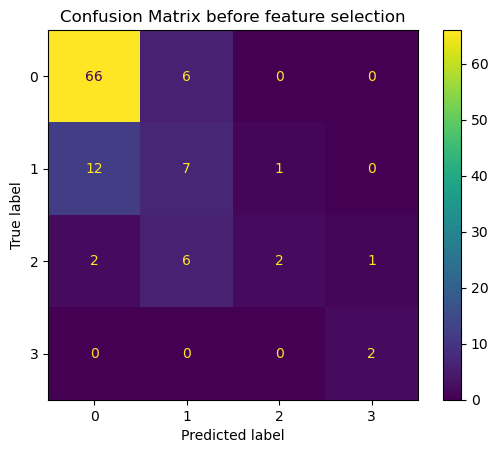

In [469]:
# cm = confusion matrix (variable name)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, # test data
                      y_pred1, # predictions
                      labels=[0,1,2,3] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1,2,3] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix before feature selection")
plt.show()

## Confusion Matrix after feature selection

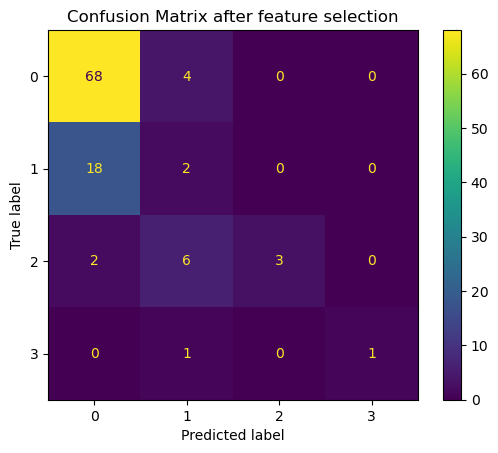

In [470]:
# cm = confusion matrix (variable name)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, # test data
                      y_pred2, # predictions
                      labels=[0,1,2,3] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1,2,3] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix after feature selection")
plt.show()

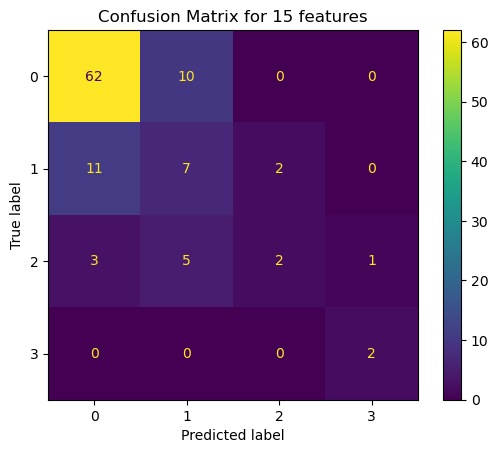

In [471]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, # test data
                      y_pred3, # predictions
                      labels=[0,1,2,3] # class labels from the knn model
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, # pass through the created confusion matrix
                              display_labels=[0,1,2,3] # class labels from the knn model 
                             )

disp.plot()

plt.title("Confusion Matrix for 15 features")
plt.show()